In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
if not os.path.exists('massbalance') and os.path.exists('../massbalance'):    # hack to allow scripts to be placed in subdirectories next to pyAp
    sys.path.insert(1, os.path.abspath('..'))
from massbalance.mb_tools import MassBalance  # this is the core class of the mb calculation

### 1. Define elements for calculation

In [3]:
cmpnts = ['SiO2','Al2O3', 'TiO2', 'MgO', 'FeO', 'MnO',  'CaO', 'Na2O', 'K2O', 'P2O5', 'Cr2O3']  # change your desired elements for mass balance calculation

In [4]:
cmpnts_std =[x + '_std' for x in cmpnts]  # save columns for std
cmpnts_std

['SiO2_std',
 'Al2O3_std',
 'TiO2_std',
 'MgO_std',
 'FeO_std',
 'MnO_std',
 'CaO_std',
 'Na2O_std',
 'K2O_std',
 'P2O5_std',
 'Cr2O3_std']

### 2. Load data

In [5]:
nat_comp = pd.ExcelFile("input_comp.xlsx")

We load the whole excel spreadsheet to a pandas ExcelFile, to access data in your spreadsheet, you can do so by looping through ExcelFile to a dictionary:

In [6]:
nat_dict = {}  # create dictionary to collect compositions of different phases
nat_phases = []  # create list to save all phases in the calculation. Note bulk will be the bulk compsition, run_index will be your sample number, or rock id . etc
for sheet_name in nat_comp.sheet_names:
    nat_phases.append(sheet_name)
    nat_dict[sheet_name] = nat_comp.parse(sheet_name)

``nat_phases`` stores the sheet names, ``nat_dict`` stores the data of each sheet. 

In [7]:
nat_phases

['gl', 'ol', 'sp', 'py', 'pureFe', 'pureNa', 'bulk', 'run_index']

Use the sheet name to access data, let's what we have in the ``gl`` phase


In [8]:
nat_dict['gl'].head()

,Run_no,SiO2,Al2O3,P2O5,CaO,FeO,Na2O,MgO,TiO2,K2O,...,Al2O3_std,P2O5_std,CaO_std,FeO_std,Na2O_std,MgO_std,TiO2_std,K2O_std,MnO_std,Cr2O3_std
0,02As1,46.66,10.16,0.17,11.64,13.06,1.95,13.15,2.43,0.49,...,0.17,0.10,0.22,0.34,0.10,0.26,0.20,0.04,0.04,0.04
1,01As1,46.96,10.34,0.20,11.81,13.21,1.84,12.16,2.53,0.44,...,0.11,0.07,0.20,0.21,0.10,0.12,0.14,0.05,0.03,0.08
2,04As1,47.20,10.80,0.23,12.13,12.77,1.87,11.04,2.65,0.48,...,0.11,0.05,0.21,0.45,0.14,0.09,0.16,0.05,0.05,0.03
3,03As1,48.38,11.36,0.18,12.63,13.03,1.42,10.35,2.54,0.43,...,0.16,0.06,0.12,0.27,0.07,0.19,0.27,0.05,0.05,0.05
4,05As1,47.18,11.63,0.23,12.84,12.57,2.04,9.42,2.60,0.51,...,0.12,0.05,0.25,0.20,0.12,0.18,0.23,0.05,0.04,0.05


### 3. Mass balance calculation

In [19]:
mb_cal = MassBalance(
    input_comp=nat_comp,
    comp_col=cmpnts,
    comp_std_col=cmpnts_std,
    match_column="Run_no",
    bulk_sheet="bulk",
    index_sheet="run_index",
    normalize=True,
)

In [20]:
res_dict = mb_cal.compute(mc=100, exportFiles=True, batch_bulk=True, method='nnl')

In [21]:
res_dict

{'02As1':           gl        ol   sp   py  pureFe    pureNa        r2  residues
 0   0.991460  0.021747  0.0  0.0     0.0  0.001608  0.356634  0.127188
 1   0.974926  0.024034  0.0  0.0     0.0  0.001542  0.684709  0.468826
 2   0.977975  0.024399  0.0  0.0     0.0  0.000000  0.549462  0.301908
 3   0.998584  0.018338  0.0  0.0     0.0  0.000000  0.623763  0.389080
 4   0.978460  0.027727  0.0  0.0     0.0  0.000000  0.791784  0.626923
 ..       ...       ...  ...  ...     ...       ...       ...       ...
 95  0.973279  0.024162  0.0  0.0     0.0  0.000455  0.445936  0.198859
 96  0.972869  0.029593  0.0  0.0     0.0  0.001926  0.818117  0.669315
 97  0.974119  0.025947  0.0  0.0     0.0  0.000379  0.612259  0.374861
 98  0.976495  0.021593  0.0  0.0     0.0  0.000000  0.447712  0.200446
 99  1.005494  0.006703  0.0  0.0     0.0  0.001379  0.887912  0.788388
 
 [100 rows x 8 columns],
 '01As1':           gl        ol   sp   py  pureFe    pureNa        r2  residues
 0   0.957238  0.04

In [11]:
res_02As1 = res_dict['02As1']
res_02As1

,gl,ol,sp,py,pureFe,pureNa,r2,residues
0,0.973176,0.019715,0.0,0.0,0.0,0.002498,0.484440,0.234682
1,0.966235,0.036826,0.0,0.0,0.0,0.000498,0.892664,0.796848
2,0.980381,0.023393,0.0,0.0,0.0,0.001340,0.973339,0.947389
3,0.987117,0.021411,0.0,0.0,0.0,0.000512,1.261967,1.592560
4,0.982864,0.021373,0.0,0.0,0.0,0.000670,1.379474,1.902949
...,...,...,...,...,...,...,...,...
95,0.982980,0.016666,0.0,0.0,0.0,0.000119,1.110129,1.232386
96,0.975976,0.026063,0.0,0.0,0.0,0.000000,0.851714,0.725417
97,0.984092,0.015631,0.0,0.0,0.0,0.000609,1.128356,1.273188
98,0.970248,0.024932,0.0,0.0,0.0,0.000000,1.084596,1.176348


This is the MC results (100 times), to calculate statistical infos, you can simply call the built-in pandas functions as:

In [12]:
res_02As1.describe()

,gl,ol,sp,py,pureFe,pureNa,r2,residues
count,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000
mean,0.979243,0.022744,0.0,0.0,0.000054,0.000524,0.812893,0.767074
std,0.009672,0.006799,0.0,0.0,0.000328,0.000704,0.327647,0.587718
min,0.960060,0.006024,0.0,0.0,0.000000,0.000000,0.191910,0.036829
25%,0.973027,0.017675,0.0,0.0,0.000000,0.000000,0.563707,0.317767
50%,0.978517,0.022876,0.0,0.0,0.000000,0.000240,0.767086,0.588507
75%,0.984920,0.026260,0.0,0.0,0.000000,0.000761,1.053219,1.109313
max,1.000465,0.039245,0.0,0.0,0.002663,0.003195,1.698585,2.885192


or only interested parameters

In [13]:
res_02As1.agg(['mean', 'median', 'std'])

,gl,ol,sp,py,pureFe,pureNa,r2,residues
mean,0.979243,0.022744,0.0,0.0,0.000054,0.000524,0.812893,0.767074
median,0.978517,0.022876,0.0,0.0,0.000000,0.000240,0.767086,0.588507
std,0.009672,0.006799,0.0,0.0,0.000328,0.000704,0.327647,0.587718


To plot the result, you can simply do:

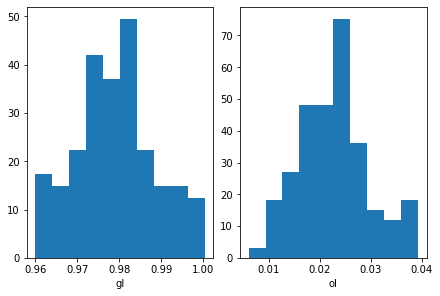

In [14]:
fig, axes = plt.subplots(1,2, constrained_layout=True)
axes[0].hist(res_02As1['gl'], density=True)
axes[1].hist(res_02As1['ol'], density=True)
axes[0].set_xlabel('gl')
axes[1].set_xlabel('ol')
plt.show()

We pre-defined pure FeO and pure Na2O phases as the evaluation of Fe loss and Na loss, if you don't want to check this, simply delete these sheets
Below we give an example to calculate Fe loss (%) and Na loss (%) in the first experimental run `02As1`


In [15]:
nat_bulk = nat_dict['bulk'].set_index('Run_no')
nat_bulk.loc['02As1', 'FeO']

12.42

In [16]:
nat_bulk.loc['02As1', 'Na2O']

1.96

In [17]:
res_02As1['Fe_loss'] = res_02As1['pureFe'] / nat_bulk.loc['02As1', 'FeO'] * 100 * 100
res_02As1['Fe_loss'].agg(['mean', 'median', 'std'])

mean      0.043493
median    0.000000
std       0.264184
Name: Fe_loss, dtype: float64

In [18]:
res_02As1['Na2O_loss'] = res_02As1['pureNa'] / nat_bulk.loc['02As1', 'Na2O'] * 100 * 100
res_02As1['Na2O_loss'].agg(['mean', 'median', 'std'])

mean      2.672525
median    1.225675
std       3.591108
Name: Na2O_loss, dtype: float64